# 简单的读取文件

In [1]:
with open("../2021.11.14/a.txt", "r", encoding="gbk") as f:
    # 打印所有字符
    # print(f.read())
    
    # 打印一行 
    print(f.readline())
    print(f.readline())
    # 连续打印 问题：为什么会输出四行？
    # 打印一个列表
    # print(f.readlines())

FileNotFoundError: [Errno 2] No such file or directory: 'a.txt'

# 读取一个表格文件

一共由两种方式：一是我们自己对文件进行解析，二是我们使用现有的模块，我们先介绍第一种方式。

在第一种方式中，我们需要用到之前学到的列表和循环的知识，逐层解析出需要的数据。

## 第一种方式

### 第一步 读取文件

In [7]:
# 第一种方式
stu_sco_list = []
with open("../student_score.csv", "r", encoding="utf-8") as f:
    stu_sco_list = f.readlines()

print(stu_sco_list)

['学号,高数,英语,Python\n', '1001,89,67,90\n', '1002,67,98,91\n', '1003,76,90,86\n', '1004,97,91,89\n', '1005,76,32,65\n', '1006,44,89,54\n', '1007,78,96,34\n', '1008,67,78,76\n', '1009,89,32,98\n', '1010,65,43,65\n', '1011,98,78,67\n', '1012,12,98,76\n', '1013,43,64,54\n', '1014,98,34,76\n', '1015,34,65,87\n', '1016,21,76,76\n', '1017,98,87,98\n', '1018,99,54,56\n', '1019,67,76,87\n', '1020,78,65,71\n', '1021,98,45,78\n', '1022,56,98,90\n', '1023,67,23,98\n', '1024,69,67,69\n', '1025,76,98,60\n', '1026,74,34,59\n', '1027,91,65,78\n', '1028,94,98,90\n', '1029,89,67,58\n', '1030,67,98,88\n']


查看读取的结果，验证自己的读取是正确的。

In [16]:
# 按照行进行输出前五行
for i in range(1, 5): # 0 1 2 3 4 
    print(stu_sco_list[i], end="")

1001,89,67,90
1002,67,98,91
1003,76,90,86
1004,97,91,89


In [15]:
for line in stu_sco_list[1:5]: # 0 / 1 2 3 4 / 5 6 7 8 
    print(line, end="")

1001,89,67,90
1002,67,98,91
1003,76,90,86
1004,97,91,89


### 第二步 讲读取的str类型转化成int类型

str类型的数据无法进行处理，所以我们需要将其转化成int，float类型进行处理，如果数据全是整数，就转化成int类型，不然就转换成float类型。

In [17]:
line2 = stu_sco_list[1] # 取出第二行，第一行为表格头

# 将数据进行切片
line2_list = line2[:-1].split(",")
print(line2_list)
print(type(line2_list[1])) 

['1001', '89', '67', '90']
<class 'str'>


将所有的数据都进行类型转换

In [18]:
for i in range(len(line2_list)):
    line2_list[i] = int(line2_list[i]) # 类型转换 str -> int
    
print(line2_list)
print(type(line2_list[1]))

[1001, 89, 67, 90]
<class 'int'>


In [19]:
# 对所有数据进行处理
all_stu = [] # 建立一个存放所有学生成绩的总表
tab_head = stu_sco_list[0][:-1].split(",") # 这是一个表头
print(tab_head)

['学号', '高数', '英语', 'Python']


将所有的数据放入到一个新的列表里

In [21]:
for each in  stu_sco_list[1:]: # [1:] 不算表头
    each = each[:-1].split(",")
    for i in range(len(each)): # 0 1 2 ... n
        each[i] = int(each[i])
    all_stu.append(each)
print(all_stu)

[[1001, 89, 67, 90], [1002, 67, 98, 91], [1003, 76, 90, 86], [1004, 97, 91, 89], [1005, 76, 32, 65], [1006, 44, 89, 54], [1007, 78, 96, 34], [1008, 67, 78, 76], [1009, 89, 32, 98], [1010, 65, 43, 65], [1011, 98, 78, 67], [1012, 12, 98, 76], [1013, 43, 64, 54], [1014, 98, 34, 76], [1015, 34, 65, 87], [1016, 21, 76, 76], [1017, 98, 87, 98], [1018, 99, 54, 56], [1019, 67, 76, 87], [1020, 78, 65, 71], [1021, 98, 45, 78], [1022, 56, 98, 90], [1023, 67, 23, 98], [1024, 69, 67, 69], [1025, 76, 98, 60], [1026, 74, 34, 59], [1027, 91, 65, 78], [1028, 94, 98, 90], [1029, 89, 67, 58], [1030, 67, 98, 88]]


这个时候我们就可以进行计算了， 我们首先计算一下各科的平均分

In [23]:
total_stu_num = len(all_stu) # 学生总数
total_stu_num

30

In [24]:
total_sco = [0] * 3 # 各个总分 [0, 0, 0]
mean_sco = [0] * 3  # 存放平均分 [0, 0, 0]


for i in range(3): # 0 1 2 
    for one_stu in all_stu:
        # total_sco[i] = total_sco[i] + one_stu[i+1]
        total_sco[i] += one_stu[i+1]
    
    mean_sco[i] = total_sco[i] / total_stu_num

print(total_sco)
print(total_stu_num)
print(mean_sco)

[2177, 2106, 2264]
30
[72.56666666666666, 70.2, 75.46666666666667]


## 第二种读取方式

通过模块pandas读取。pandas是一个数据处理模块。

In [11]:
# 首先要安装pandas和numpy
!pip install numpy
!pip install pandas

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


### 第二步 读取文件

使用模块可以很简单的读取文件，并且支持多种文件类型。手动读取只能支持很少的文件类型。

In [32]:
import pandas as pd

# dataframe
df = pd.read_csv("../student_score.csv")
print(df.head()) # 打印前几行
print(df.tail()) # 打印后几行

     学号  高数  英语  Python
0  1001  89  67      90
1  1002  67  98      91
2  1003  76  90      86
3  1004  97  91      89
4  1005  76  32      65
      学号  高数  英语  Python
25  1026  74  34      59
26  1027  91  65      78
27  1028  94  98      90
28  1029  89  67      58
29  1030  67  98      88


数据的一些信息

In [35]:
print(df.columns) # 表头，或者说是列头
print(df.index)    # 行的索引，行序号

Index(['学号', '高数', '英语', 'Python'], dtype='object')
RangeIndex(start=0, stop=30, step=1)


将学号设置位索引

In [30]:
# 将第一行作为索引，并删除它
df1 = df.set_index('学号',drop=True)
print(df1.head())

      高数  英语  Python
学号                  
1001  89  67      90
1002  67  98      91
1003  76  90      86
1004  97  91      89
1005  76  32      65


计算各科的平均值

In [38]:
# 计算平均值
df1.mean()

高数        72.566667
英语        70.200000
Python    75.466667
dtype: float64

In [39]:
df1.describe()  # 快速显示各种统计信息

,高数,英语,Python
count,30.000000,30.000000,30.000000
mean,72.566667,70.200000,75.466667
std,23.188409,23.857913,15.884786
min,12.000000,23.000000,34.000000
25%,67.000000,56.500000,65.000000
50%,76.000000,71.500000,76.000000
75%,90.500000,90.750000,88.750000
max,99.000000,98.000000,98.000000


成绩排序

In [42]:
# 按照某一个科目成绩进行排序 ascending 升序，默认升序。设置成False表示降序
df1.sort_values(by='高数', ascending=False).head()

,高数,英语,Python
学号,,,
1018,99,54,56
1021,98,45,78
1017,98,87,98
1014,98,34,76
1011,98,78,67


## 计算每个人的总分并排序

In [44]:
# 
df_sum = df1.apply(lambda x: x.sum(), axis=1)
df_sum

学号
1001    246
1002    256
1003    252
1004    277
1005    173
1006    187
1007    208
1008    221
1009    219
1010    173
1011    243
1012    186
1013    161
1014    208
1015    186
1016    173
1017    283
1018    209
1019    230
1020    214
1021    221
1022    244
1023    188
1024    205
1025    234
1026    167
1027    234
1028    282
1029    214
1030    253
dtype: int64

In [46]:
df2 = pd.concat([df1, df_sum], axis=1)
df2.rename(columns = {0 : "总分"}, inplace = True)
print(df2.columns)
df2.head()

Index(['高数', '英语', 'Python', '总分'], dtype='object')


,高数,英语,Python,总分
学号,,,,
1001,89,67,90,246
1002,67,98,91,256
1003,76,90,86,252
1004,97,91,89,277
1005,76,32,65,173


In [53]:
# 按照总分排序
df2.sort_values(by="总分", ascending=False).head()

,高数,英语,Python,总分
学号,,,,
1017,98,87,98,283
1028,94,98,90,282
1004,97,91,89,277
1002,67,98,91,256
1030,67,98,88,253


# 统计整体的成绩情况

对于一个科目的成绩来说，分别统计高数成绩中

< 60的人数

\> 60的人数

\> 80的人数


In [56]:
labels = ["<60", "60~80", ">80"]
stu_nums = [0] * 3
stu_nums[0] = len(df2[df2["高数"] < 60])
stu_nums[1] = len(df2[(df2["高数"] >= 60) & (df2["高数"] <= 80 )]) # & -> 与 and #  | -> 或 or 
stu_nums[2] = len(df2[df2["高数"] > 80])

print(stu_nums)

[6, 13, 11]


### 试着分别统计其他两种情况的成绩分布。

# 简单的将数据可视化

将上述数据进行可视化，数据可视化主要使用https://www.matplotlib.org.cn/intro/

In [22]:
# 安装绘图库
!pip install matplotlib

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


<Figure size 6000x6000 with 0 Axes>

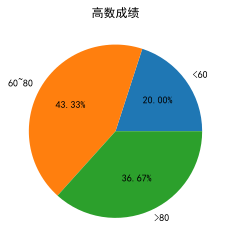

In [57]:
import matplotlib.pyplot as plt  

%matplotlib inline
%config InlineBackend.figure_format = 'svg' # 设置位矢量图，更加清晰

plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
plt.rcParams["axes.unicode_minus"]=False

plt.figure(figsize=(10, 10), dpi=600)

fig = plt.figure()
plt.pie(stu_nums,labels=labels,autopct='%1.2f%%') #画饼图（数据，数据对应的标签，百分数保留两位小数点）
plt.title("高数成绩")
  
plt.show()  